# Traffic accidents in Saudi Arabia during 1939 Hijri

## Business Understanding

Traffic accidents in Saudi Arabia have become one of the main problems the kingdom is dealing with. With this project I try to look at the number of children involved in those accidents and find out when and where their percentage is lower.

- What is the total number of accidents per month?
- What is the percentage of children that are involved in these accidents per month?
- What is the the percentage of children involved for each region during the whole year?
- Comparing the largest regions in the kingdom of Saudi Arabia, where is the highest percentage of children involvement into traffic accidents?



## Data Understanding


In [233]:
#importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
%matplotlib inline

In [234]:
# importing data, data received from my mentor, and is to be found in Saudi open data portal. 
# read all excel sheets and combine them in one dataframe
# add a column with sheet's name, which is the region name
workbook = pd.ExcelFile('traffic-accident-statistics-as-of-1439-h.xls')
sheets = workbook.sheet_names
df = pd.concat([pd.read_excel(workbook, sheet_name=s)
                .assign(region=s) for s in sheets])


In [235]:
# resetting the index
df.reset_index(drop=True,inplace=True)

In [236]:
# data's headers are in arabic, I am going to use the data concerning the age groups only
df.head()

,الشهر,حادث تلفيات,حادث اصابات,حادث وفيات,مجموع عدد الحوادث,السبت,الا حد,الاثنين,الثلاثاء,الا ربعاء,...,عدم التقيد بالاشارة,السرعة الزائدة,السائق تحت تأثير مخدر,اخرى.1,مجموع الحوادث حسب سبب الحادث,عدد المصابين,عدد المتوفين (القتلى),سليم,مجموع الأشخاص المشمولين بالحوادث,region
0,محرم,5047,277,75,5399,919,781,625,814,702,...,1208,1304,0,0,5399,393,100,12435,12928,الرياض
1,صفر,5941,255,78,6274,1427,1407,1434,857,421,...,739,997,0,0,6274,433,98,9110,9641,الرياض
2,ربيع أول,7808,271,87,8166,1209,1435,1121,1122,1140,...,1380,2444,0,0,8166,455,105,15385,15945,الرياض
3,ربيع ثانى,7821,266,79,8166,1368,1436,1094,1054,1085,...,1366,1992,0,0,8166,427,91,15181,15699,الرياض
4,جمادى أول,7923,237,81,8241,1410,1298,1014,1088,1110,...,1426,2228,0,0,8241,358,96,15437,15891,الرياض


In [237]:
df.shape

(226, 75)

In [238]:
# all columns naming is in arabic
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 75 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   الشهر                                              222 non-null    object 
 1   حادث تلفيات                                        223 non-null    object 
 2   حادث اصابات                                        222 non-null    object 
 3   حادث وفيات                                         222 non-null    object 
 4    مجموع عدد الحوادث                                 222 non-null    object 
 5   السبت                                              222 non-null    object 
 6   الا حد                                             222 non-null    object 
 7   الاثنين                                            222 non-null    object 
 8   الثلاثاء                                           222 non-null    object 
 9   الا ربعاء 

In [239]:
# checking missing data
df.isnull().sum()

الشهر                               4
حادث تلفيات                         3
حادث اصابات                         4
حادث وفيات                          4
 مجموع عدد الحوادث                  4
                                   ..
عدد المصابين                        4
عدد المتوفين (القتلى)               4
سليم                                4
مجموع الأشخاص المشمولين بالحوادث    4
region                              0
Length: 75, dtype: int64

In [240]:
#listing all columns
df.columns

Index([                                            'الشهر',
                                             'حادث تلفيات',
                                             'حادث اصابات',
                                              'حادث وفيات',
                                      ' مجموع عدد الحوادث',
                                                   'السبت',
                                                  'الا حد',
                                                 'الاثنين',
                                                'الثلاثاء',
                                               'الا ربعاء',
                                                  'الخميس',
                                                  'الجمعة',
                          'مجموع عدد الحوادث لجميع الأيام',
                                                   'نهارا',
                                                    'ليلا',
                             'مجموع عدد الحوادث حسب الوقت',
                                        

## Preparing Data

In [241]:
#copying the columns needed for my analysis
df= df[['الشهر',"region",-18,'18+','30+','40+','50+']].copy()
df.head()

,الشهر,region,-18,18+,30+,40+,50+
0,محرم,الرياض,2417.0,4583,4390,1264,274
1,صفر,الرياض,1843.0,2281,2452,2053,1012
2,ربيع أول,الرياض,2722.0,3833,3697,3841,1852
3,ربيع ثانى,الرياض,2855.0,3796,3541,3280,1709
4,جمادى أول,الرياض,2844.0,3862,3623,3841,1721


In [242]:
# rename some columns
df.rename(columns={-18:"18-","الشهر" :"month"},inplace=True)

In [243]:
df.head()

,month,region,18-,18+,30+,40+,50+
0,محرم,الرياض,2417.0,4583,4390,1264,274
1,صفر,الرياض,1843.0,2281,2452,2053,1012
2,ربيع أول,الرياض,2722.0,3833,3697,3841,1852
3,ربيع ثانى,الرياض,2855.0,3796,3541,3280,1709
4,جمادى أول,الرياض,2844.0,3862,3623,3841,1721


In [244]:
# display all unique months:
df["month"].unique()

array(['محرم', 'صفر', 'ربيع أول', 'ربيع ثانى', 'جمادى أول', 'جمادى ثانى',
       'رجب', 'شعبان', 'رمضان', 'شوال', 'ذى القعدة', 'ذى الحجة',
       'المجموع', nan, 'الشهر', 'صـفـر'], dtype=object)

In [245]:
# unify month names, rename Safar month name
df["month"].replace({"صـفـر": "صفر"}, inplace=True)

In [246]:
#values to delete, these are sums of rows in individual sheets in the original workbook
values = ["المجموع", "الشهر"]

#drop rows that contain any value in the list
df = df[df.month.isin(values) == False]

In [247]:
#drop rows that contain this value for column region as this is only a summation row in individual original sheets
df = df[df.region!='المجموع الكلي لعام 1439']

In [248]:
df.month.unique()

array(['محرم', 'صفر', 'ربيع أول', 'ربيع ثانى', 'جمادى أول', 'جمادى ثانى',
       'رجب', 'شعبان', 'رمضان', 'شوال', 'ذى القعدة', 'ذى الحجة', nan],
      dtype=object)

In [249]:
df.shape

(196, 7)

In [250]:
# renaming month names (in Hijri, islamic calender) to english spelled names

df["month"].replace({'محرم': 'Muharram',
 'صفر': 'Safar',
 'ربيع أول': 'Rabi al-awwal',
 'ربيع ثانى': 'Rabi al-thani',
 'جمادى أول': 'Jumada al-awwal',
 'جمادى ثانى': 'Jumada al-thani',
 'رجب': 'Rajab',
 'شعبان': 'Shaban',
 'رمضان': 'Ramadan',
 'شوال': 'Shawwal',
 'ذى القعدة': 'Dhul Qadah',
'ذى الحجة': 'Dhul Hijjah'}, inplace=True)

In [251]:
# replacing region names with english words

df["region"].replace({'الرياض': 'Riyadh',
 'المدينه المنوره': 'Madinah',
 'الشرقيه': 'Eastern',
 'الحدود الشماليه': 'North',
 'تبوك': 'Tabuk',
 'الجوف': 'Jouf',
 'حائل': 'Hail',
 'نجران': 'Najran',
 'القصيم': 'Qassim',
 'الـــبـا حــه': 'Baha',
 'عسير': 'Asseer',
'جازان': 'Jazan',
 'جده': 'Jedda',
 'الطائف': 'Taif',
 'العاصمه': 'Assema',
 'القريات': 'Quraiat'
                     }, inplace=True)

In [252]:
# print df number of rows and columns
df.shape

(196, 7)

In [253]:
#copy the df here to age_df
age_df = df

In [254]:
# checking nan values
age_df.isna().sum()

month     4
region    0
18-       4
18+       4
30+       4
40+       4
50+       4
dtype: int64

In [255]:
#display rows with one or more nans
age_df[df.isna().any(axis=1)]

,month,region,18-,18+,30+,40+,50+
39,NaN,Eastern,NaN,NaN,NaN,NaN,NaN
92,NaN,Hail,NaN,NaN,NaN,NaN,NaN
93,NaN,Hail,NaN,NaN,NaN,NaN,NaN
94,NaN,Hail,NaN,NaN,NaN,NaN,NaN


In [256]:
#drop the rows with nan values, because all age categoriy values are unavailable, along with the month name
age_df.dropna(inplace=True)
#check remaining rows
age_df.shape

(192, 7)

In [257]:
age_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192 entries, 0 to 211
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   month   192 non-null    object 
 1   region  192 non-null    object 
 2   18-     192 non-null    float64
 3   18+     192 non-null    object 
 4   30+     192 non-null    object 
 5   40+     192 non-null    object 
 6   50+     192 non-null    object 
dtypes: float64(1), object(6)
memory usage: 12.0+ KB


In [258]:
# convert number columns to float dtype
age_df[["18-","18+","30+","40+","50+"]]= age_df[["18-","18+","30+","40+","50+"]].astype('float')
#age_df[["month","region"]]=age_df[["month","region"]].astype('str')
age_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192 entries, 0 to 211
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   month   192 non-null    object 
 1   region  192 non-null    object 
 2   18-     192 non-null    float64
 3   18+     192 non-null    float64
 4   30+     192 non-null    float64
 5   40+     192 non-null    float64
 6   50+     192 non-null    float64
dtypes: float64(5), object(2)
memory usage: 12.0+ KB


In [259]:
# all months in month column
age_df.month.unique()

array(['Muharram', 'Safar', 'Rabi al-awwal', 'Rabi al-thani',
       'Jumada al-awwal', 'Jumada al-thani', 'Rajab', 'Shaban', 'Ramadan',
       'Shawwal', 'Dhul Qadah', 'Dhul Hijjah'], dtype=object)

In [260]:
# region column unique values
age_df.region.unique()

array(['Riyadh', 'Madinah', 'Eastern', 'North', 'Tabuk', 'Jouf', 'Hail',
       'Najran', 'Qassim', 'Baha', 'Asseer', 'Jazan', 'Jedda', 'Taif',
       'Assema', 'Quraiat'], dtype=object)

In [261]:
age_df.shape

(192, 7)

In [262]:
# display data statistics
age_df.describe()

,18-,18+,30+,40+,50+
count,192.000000,192.000000,192.000000,192.000000,192.000000
mean,363.171875,1178.427083,929.578125,552.390625,280.432292
std,596.693644,1232.603432,1084.625949,718.911990,399.607564
min,2.000000,47.000000,11.000000,0.000000,4.000000
25%,61.000000,344.250000,161.500000,88.000000,51.000000
50%,152.500000,800.000000,513.000000,285.500000,96.000000
75%,389.250000,1526.250000,1132.500000,779.500000,294.250000
max,2916.000000,4880.000000,4920.000000,3841.000000,2015.000000


### For this project I am not using predictivce analytics 

## Results

## Total accidents in 1439 H:

In [263]:
# add a column for Total accidents of all age groups for each month

age_df['Total']= age_df.iloc[:, -5:-1].sum(axis=1)

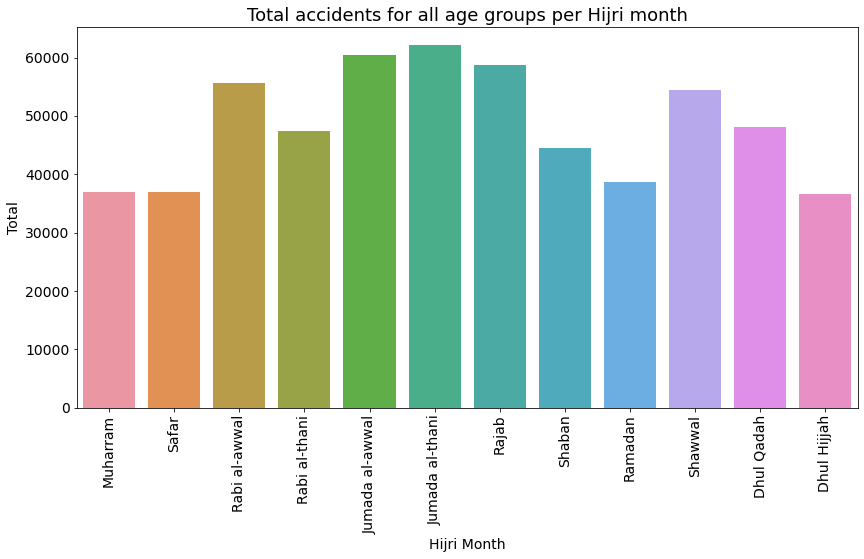

In [264]:

fig, ax = plt.subplots(figsize=(14,7))
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.ylabel('Total Accidents', fontsize=14)
plt.xlabel('Hijri Month', fontsize=14)
plt.title('Total accidents for all age groups per Hijri month', fontsize=18)
ax = sns.barplot(x=age_df.drop(["Total"], axis=1)["month"].unique(), y=age_df.groupby(["month"])['Total'].sum(),
                 order=['Muharram', 'Safar', 'Rabi al-awwal', 'Rabi al-thani',
       'Jumada al-awwal', 'Jumada al-thani', 'Rajab', 'Shaban', 'Ramadan',
       'Shawwal', 'Dhul Qadah', 'Dhul Hijjah'])

plt.show()

The months 'Jumada al-awwal', 'Jumada al-thani' & 'Rajab' in 1439H are Januari, Februari and March, they are winter months. During these months the total number of accidents goes a little bit higher than in other months

### What is the percentage of accidents where kids are involved per month in 1439 H

In [265]:
age_df.head()

,month,region,18-,18+,30+,40+,50+,Total
0,Muharram,Riyadh,2417.0,4583.0,4390.0,1264.0,274.0,12654.0
1,Safar,Riyadh,1843.0,2281.0,2452.0,2053.0,1012.0,8629.0
2,Rabi al-awwal,Riyadh,2722.0,3833.0,3697.0,3841.0,1852.0,14093.0
3,Rabi al-thani,Riyadh,2855.0,3796.0,3541.0,3280.0,1709.0,13472.0
4,Jumada al-awwal,Riyadh,2844.0,3862.0,3623.0,3841.0,1721.0,14170.0


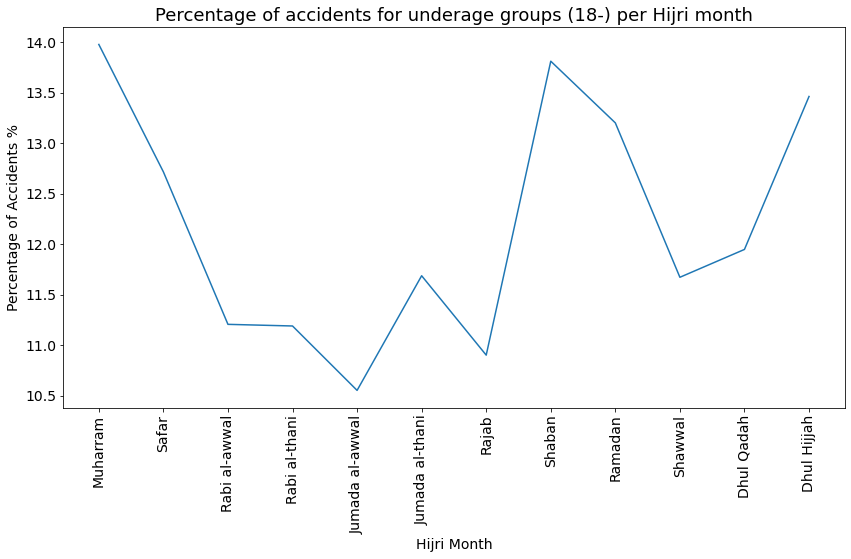

In [266]:
fig, ax = plt.subplots(figsize=(14,7))
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.ylabel('Percentage of Accidents %', fontsize=14)
plt.xlabel('Hijri Month', fontsize=14)
plt.title('Percentage of accidents for underage groups (18-) per Hijri month', fontsize=18)
tot = age_df.groupby(["month"])['Total'].sum()
ax = sns.lineplot(x=age_df["month"].unique(), y=age_df.groupby(["month"])['18-'].sum()*100/(tot),
                 )

plt.show()

As seen in this graph kids are less involved in traffic accidents during the winter months, while it is very high in september (Muharram)

### Percentage of accidents where kids are involved per region during 1439 H

Text(0.5, 0, 'Region')

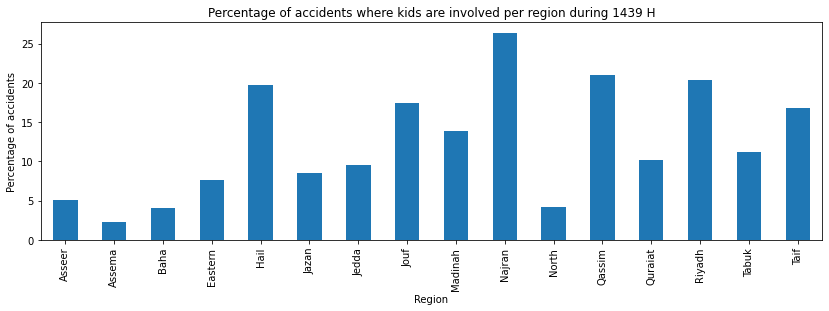

In [267]:
fig, axs = plt.subplots(figsize=(14, 4))
underage = (age_df.drop(["Total"], axis=1).groupby(['region'])["18-"].sum()*100/age_df.groupby(['region'])["Total"].sum())
underage.plot.bar(ax=axs,x="region")
axs.set_title("Percentage of accidents where kids are involved per region during 1439 H")
axs.set_ylabel("Percentage of accidents")
axs.set_xlabel("Region")

Najran, is a quite city in the south of KSA. Very strange to have the largest percentage of kids involved in traffic accidents as it is show in this chart. Let's drill down and see what is going in Najran during all months of the year

Text(0.5, 0, 'Month in Hijri')

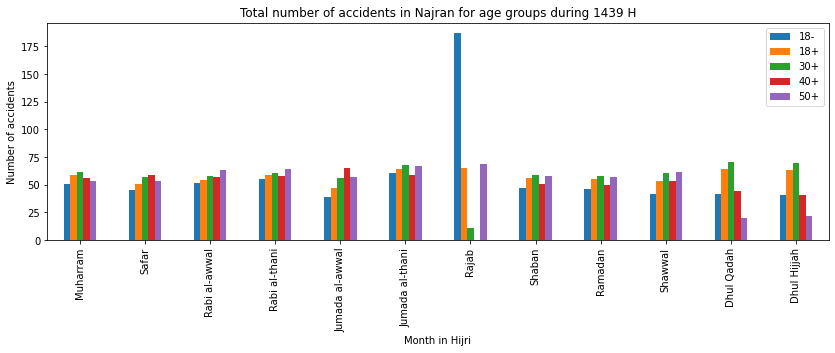

In [268]:
fig, axs = plt.subplots(figsize=(14, 4))
age_df_najran = age_df.drop('Total', axis=1)
age_df_najran.groupby(['region']).get_group("Najran").plot.bar(ax=axs,x="month")
axs.set_title("Total number of accidents in Najran for age groups during 1439 H")
axs.set_ylabel("Number of accidents")
axs.set_xlabel("Month in Hijri")

As the only month that has a peak for the number of accidents where kids are involved is Rajab, I think that the data might be incorrectly filled as the age group of "40+" is empty. So Najran has not the most of kids involvement in traffic accidents. Qassim region is where kids are most involved in such accidents

### Comparing the largest regions in the kingdom of Saudi Arabia, in wich month is the highest percentage of children involvement into traffic accidents?

In [269]:
age_df.head()


,month,region,18-,18+,30+,40+,50+,Total
0,Muharram,Riyadh,2417.0,4583.0,4390.0,1264.0,274.0,12654.0
1,Safar,Riyadh,1843.0,2281.0,2452.0,2053.0,1012.0,8629.0
2,Rabi al-awwal,Riyadh,2722.0,3833.0,3697.0,3841.0,1852.0,14093.0
3,Rabi al-thani,Riyadh,2855.0,3796.0,3541.0,3280.0,1709.0,13472.0
4,Jumada al-awwal,Riyadh,2844.0,3862.0,3623.0,3841.0,1721.0,14170.0


In [270]:
#reshaping my dataframe to produce following plots
#convert age columns to categorical values in one column, and put their values in another column 
reshape_df = pd.melt(age_df.drop(["Total"], axis=1),id_vars=['month','region'],var_name='age_category', value_name='number_of_accidents')
#select the 3 largest regions only
largest_regions_df = reshape_df.loc[reshape_df['region'].isin(["Eastern","Riyadh","Jedda"])]
largest_regions_df["region"].unique()


array(['Riyadh', 'Eastern', 'Jedda'], dtype=object)

In [289]:
fig = px.bar(largest_regions_df, x="month", color="age_category",
             y='number_of_accidents',
             title="Number of accidents for each age group in the largest KSA regions",
             barmode='group',
             height=700,
             facet_row="region",
             labels={"number_of_accidents":"Accidents Number",
                    "month":"Hijri calendar month",
                     "age_category":"Age Group",
                     "region":"Region"
                    }
            )

fig.show()

In Riyadh and in Jedda the numbers of accidents stay almost the same during the whole year. But in Eastern province the numbers go down during summer to less that 50% which is very interseting.
What could be the reason?
Maybe that most families are then outside the city, or they just stay at home most of the time because of the hot weather and schools are then closed.
Let's see how the percentage of kids involvement is changing over the year for these regions:


In [322]:
age_df.head()

,month,region,18-,18+,30+,40+,50+,Total,perc
0,Muharram,Riyadh,2417.0,4583.0,4390.0,1264.0,274.0,12654.0,0.191007
1,Safar,Riyadh,1843.0,2281.0,2452.0,2053.0,1012.0,8629.0,0.213582
2,Rabi al-awwal,Riyadh,2722.0,3833.0,3697.0,3841.0,1852.0,14093.0,0.193146
3,Rabi al-thani,Riyadh,2855.0,3796.0,3541.0,3280.0,1709.0,13472.0,0.211921
4,Jumada al-awwal,Riyadh,2844.0,3862.0,3623.0,3841.0,1721.0,14170.0,0.200706


In [323]:
import plotly.express as px

df = age_df.query("region ==(['Riyadh','Jedda','Eastern'])")
df["perc"]= df["18-"]/df["Total"]*100

fig = px.line(df, x="month", y="perc", color='region',

             title="Percentage of children involvement in traffic accidents in the 3 large region",
             height=700,
             labels={"perc":"Percentage of children involvement",
                    "month":"Hijri calendar month",
                     "age_category":"Age Group",
                     "region":"Region"
                    }
            )


fig.show()

C:\Users\fatsam\AppData\Local\Temp/ipykernel_18712/3217719834.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Clearly, in Eastern province the percentage of children decreases as soon after the schools end in the beginning of the summer holidays
But it increases slightly in Riyadh and in Jedda.


## Conclusion

A more in depth research should be made to find out why traffic accidents decrease in Eastern while they increase in other regions during the summer holidays.